In [1]:
pwd

'/Users/ar660763/Google Drive/Y-DATA/DeepLearning/assignment4/super-resolution/notebooks'

In [2]:

ls '../inputs/JPEGImages/'

ls: ../inputs/JPEGImages/: No such file or directory


In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
from torchvision.utils import save_image
import os
import cv2
import matplotlib.pyplot as plt
import pathlib
%matplotlib inline

In [19]:
ORIG_IMAGE_DIR = '/Users/ar660763/data/super-resolution/JPEGImages'

os.listdir(ORIG_IMAGE_DIR)

['003301.jpg',
 '006279.jpg',
 '008254.jpg',
 '007167.jpg',
 '000608.jpg',
 '007601.jpg',
 '001270.jpg',
 '002779.jpg',
 '005016.jpg',
 '008526.jpg',
 '007615.jpg',
 '009638.jpg',
 '005764.jpg',
 '008268.jpg',
 '004452.jpg',
 '002023.jpg',
 '002745.jpg',
 '006523.jpg',
 '000146.jpg',
 '007629.jpg',
 '001258.jpg',
 '002751.jpg',
 '002989.jpg',
 '005980.jpg',
 '004446.jpg',
 '002037.jpg',
 '006251.jpg',
 '009162.jpg',
 '000620.jpg',
 '008297.jpg',
 '009189.jpg',
 '002962.jpg',
 '009823.jpg',
 '002976.jpg',
 '006286.jpg',
 '007826.jpg',
 '002786.jpg',
 '005214.jpg',
 '001072.jpg',
 '008730.jpg',
 '007365.jpg',
 '009348.jpg',
 '001714.jpg',
 '003103.jpg',
 '002209.jpg',
 '005566.jpg',
 '003117.jpg',
 '008042.jpg',
 '001066.jpg',
 '006709.jpg',
 '007417.jpg',
 '003671.jpg',
 '009412.jpg',
 '004136.jpg',
 '002547.jpg',
 '002221.jpg',
 '007359.jpg',
 '009374.jpg',
 '004644.jpg',
 '004122.jpg',
 '003895.jpg',
 '009406.jpg',
 '006735.jpg',
 '008718.jpg',
 '000344.jpg',
 '008095.jpg',
 '004863.j

## Create new image files from original images

In [6]:

len(os.listdir(ORIG_IMAGE_DIR))

5011

In [20]:
# Dataset of original images

class ImageDataset(Dataset):
    def __init__(self, images_folder_path, final_image_resolution=None, transform=None):
        super().__init__()
        self.final_image_resolution = final_image_resolution
        self.images_folder_path = images_folder_path
        self.transform = transform
        self.image_files = os.listdir(self.images_folder_path)
        

    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self,idx):
        filename = self.image_files[idx]
        image_path = os.path.join(self.images_folder_path, self.image_files[idx])  
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
        if not self.transform is None:
            img = self.transform(img)      
        return filename, img
        

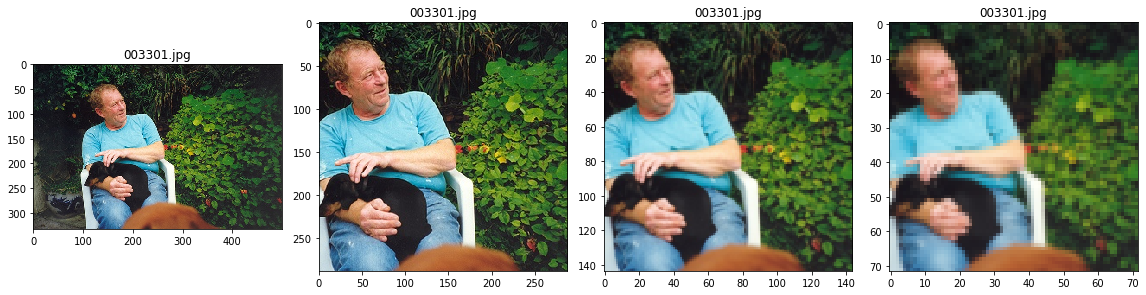

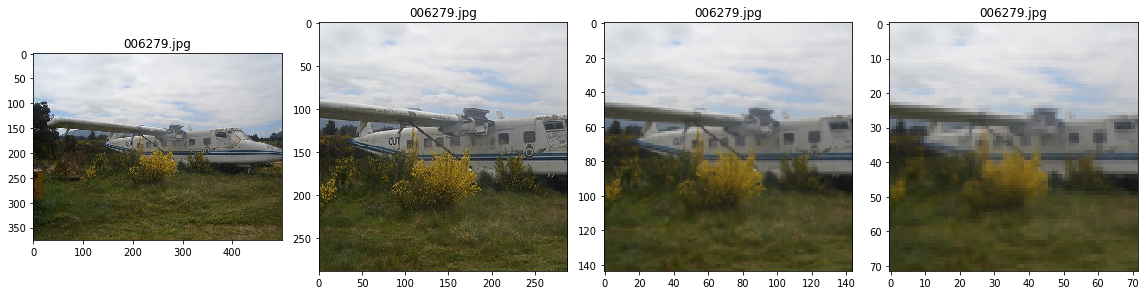

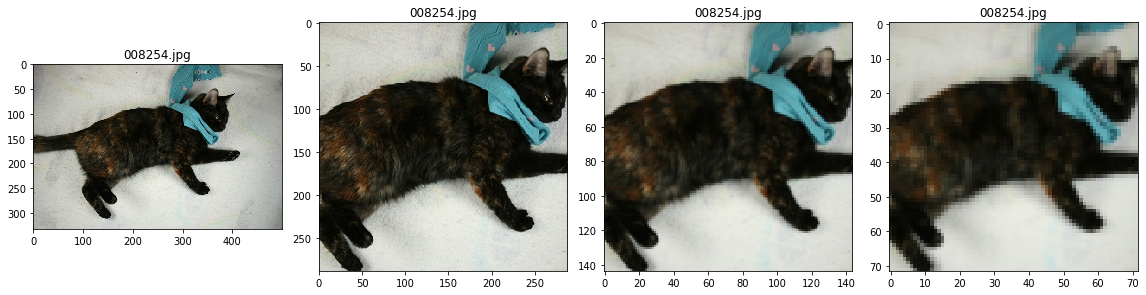

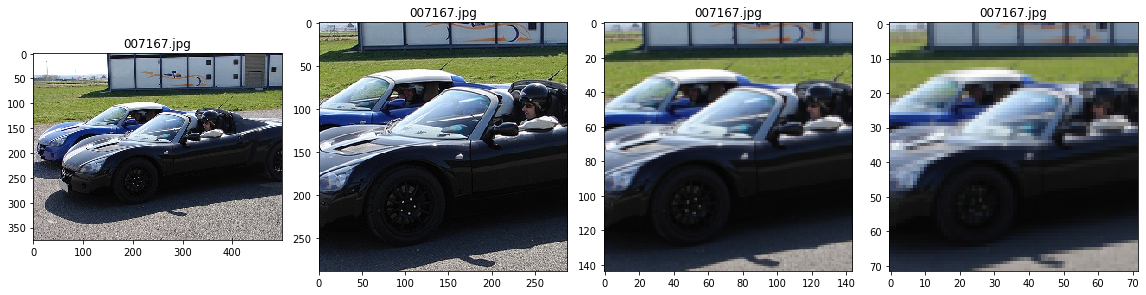

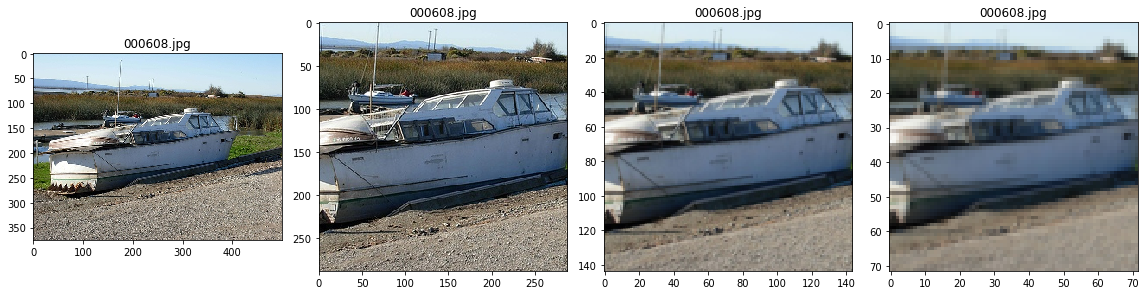

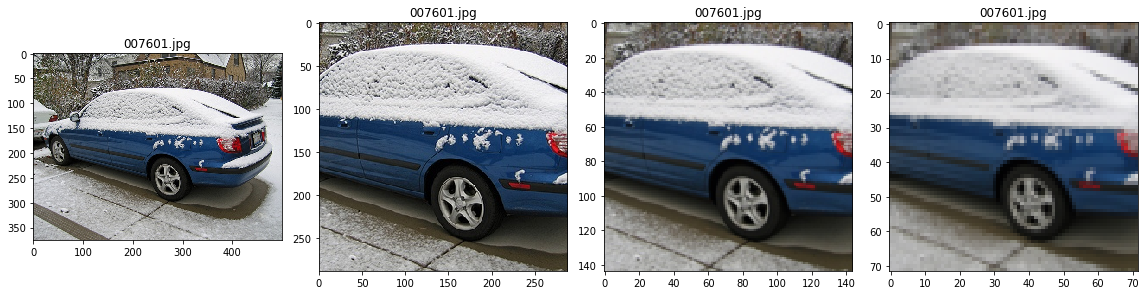

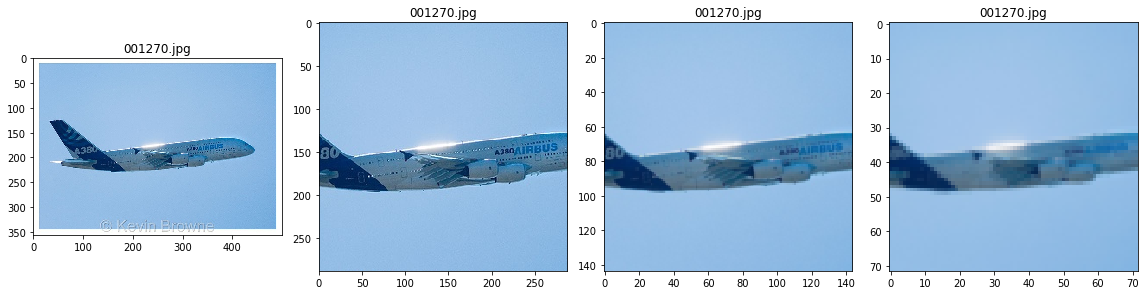

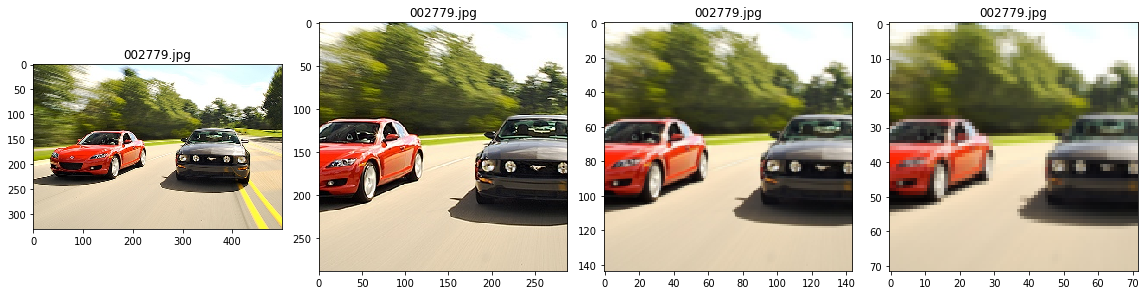

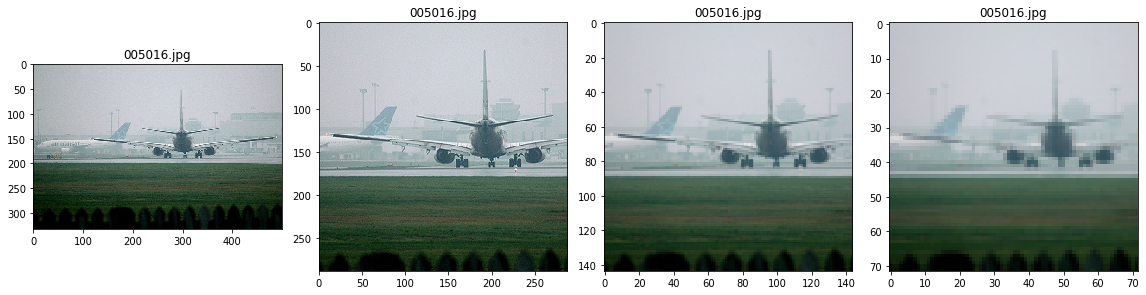

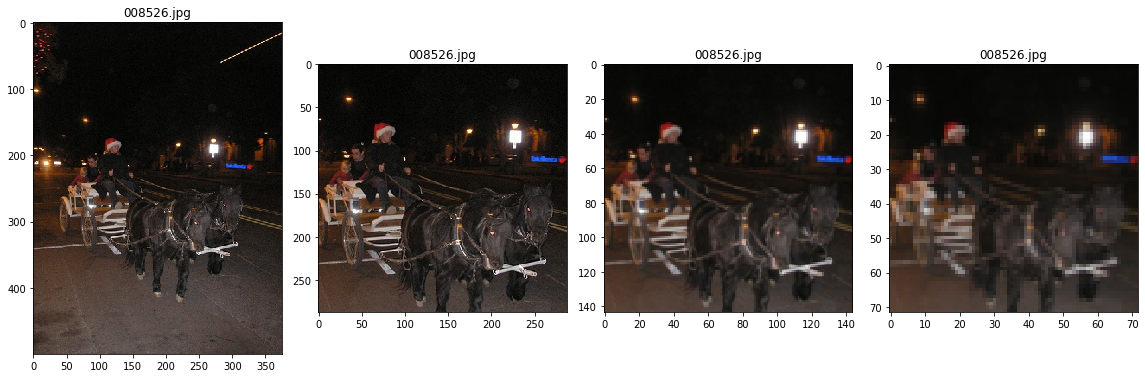

In [21]:
transform_288 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.CenterCrop(288),
    transforms.ToTensor()
])

transform_144 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.CenterCrop(288),
    transforms.Resize((144,144)),
    transforms.ToTensor()
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_72 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.CenterCrop(288),
    transforms.Resize((72,72)),
    transforms.ToTensor()
])



img_dataset_orig = ImageDataset(ORIG_IMAGE_DIR)
img_dataset_288 = ImageDataset(ORIG_IMAGE_DIR,transform=transform_288)
img_dataset_144 = ImageDataset(ORIG_IMAGE_DIR,transform=transform_144)
img_dataset_72 = ImageDataset(ORIG_IMAGE_DIR,transform=transform_72)


def show_img(img):
    #plt.figure(figsize=(18,15))
    # unnormalize
    #img = img / 2 + 0.5  
    npimg = img.numpy()
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.show()
    
#img_dataset_orig[7].shape, img_dataset_288[7].shape, img_dataset_144[7].shape, img_dataset_72[7].shape
#plt.imshow(img_dataset_orig[7])
#plt.imshow(img_dataset_288[7])

#plt.imshow(img_dataset_orig[7])
#show_img(img_dataset_288[7])

def show_transforms(img_orig, img_288, img_144, img_72):
    plt.figure(figsize=(16,8))
    plt.subplot(1,4,1)
    plt.imshow(img_orig[1])
    plt.title(img_orig[0])
    plt.subplot(1,4,2)
    plt.title(img_288[0])
    show_img(img_288[1])
    plt.subplot(1,4,3)
    show_img(img_144[1])
    plt.title(img_144[0])
    plt.subplot(1,4,4)
    show_img(img_72[1])
    plt.title(img_72[0])
    plt.tight_layout()
    plt.show()


    
#show_transforms(img_dataset_orig[7],img_dataset_288[7],img_dataset_144[7],img_dataset_72[7])

#show_transforms(img_dataset_orig[2],img_dataset_288[2],img_dataset_144[2],img_dataset_72[2])

#for i in range(10):
#    show_transforms(img_dataset_orig[i],img_dataset_288[i],img_dataset_144[i],img_dataset_72[i])


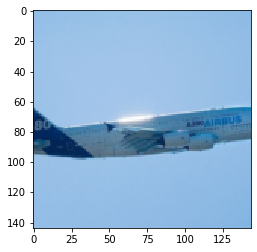

In [63]:
# writing to file
OUTPUT_PATH = '/Users/ar660763/data/super-resolution/converted_images/'
img = img_dataset_144[6]
show_img(img)
#img = img.numpy()
#img.shape
#img = np.transpose(img,(1,2,0))
#print(img.shape)
#img
#img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#img
#cv2.imwrite(OUTPUT_PATH + 'test2.jpg', img)
save_image(img, OUTPUT_PATH + 'test3.jpg')

In [22]:
%%time

img_dataset_orig = ImageDataset(ORIG_IMAGE_DIR)
img_dataset_288 = ImageDataset(ORIG_IMAGE_DIR,transform=transform_288)
img_dataset_144 = ImageDataset(ORIG_IMAGE_DIR,transform=transform_144)
img_dataset_72 = ImageDataset(ORIG_IMAGE_DIR,transform=transform_72)

DEST_PATH = '/Users/ar660763/data/super-resolution/converted_images/'

#!mkdir DEST_PATH + 'small'
#!mkdir DEST_PATH + 'med'
#!mkdir DEST_PATH + 'large'

img_loader_288 = DataLoader(img_dataset_288)
for step, data in enumerate(img_loader_288):
    filename, img = data
    save_image(img, DEST_PATH + 'large/' + '288_' + filename[0] )

img_loader_144 = DataLoader(img_dataset_144)
for step, data in enumerate(img_loader_144):
    filename, img = data
    save_image(img, DEST_PATH + 'med/' + '144_' + filename[0] )
    
img_loader_72 = DataLoader(img_dataset_72)
for step, data in enumerate(img_loader_72):
    filename, img = data
    save_image(img, DEST_PATH + 'small/' + '72_' + filename[0] )
    

CPU times: user 1min 8s, sys: 5.49 s, total: 1min 13s
Wall time: 1min 16s


/bin/sh: -c: line 0: syntax error near unexpected token `DEST_PATH'
/bin/sh: -c: line 0: `mkdir (DEST_PATH + 'new2/')'


## Training and Validation Loaders

In [93]:
DEST_PATH_SMALL = '/Users/ar660763/data/super-resolution/converted_images/small'
DEST_PATH_MED = '/Users/ar660763/data/super-resolution/converted_images/med'
DEST_PATH_LARGE = '/Users/ar660763/data/super-resolution/converted_images/large'
ROOT_IMAGE_PATH = '/Users/ar660763/data/super-resolution/converted_images'

DEV = True

class SuperResDataset(Dataset):
    def __init__(self, root_images_folder_path, transform=None, is_train=False, dev_train_size=None, dev_val_size=None):
        super().__init__()
        self.root_images_folder_path = root_images_folder_path
        self.transform = transform
        self.is_train = is_train
        sorted_filenames_small = sorted(os.listdir(self.root_images_folder_path + '/small'))
        sorted_filenames_med = sorted(os.listdir(self.root_images_folder_path + '/med'))
        sorted_filenames_large = sorted(os.listdir(self.root_images_folder_path + '/large'))
        if is_train:
            if dev_train_size:
                self.image_files_small = sorted_filenames_small[1000:1000+dev_train_size]
                self.image_files_med = sorted_filenames_med[1000:1000+dev_train_size]
                self.image_files_large = sorted_filenames_large[1000:1000+dev_train_size]
            else:    
                self.image_files_small = sorted_filenames_small[1000:]
                self.image_files_med = sorted_filenames_med[1000:]
                self.image_files_large = sorted_filenames_large[1000:]
        else:
            if dev_val_size:
                self.image_files_small = sorted_filenames_small[:dev_val_size]
                self.image_files_med = sorted_filenames_med[:dev_val_size]
                self.image_files_large = sorted_filenames_large[:dev_val_size]
            else:    
                self.image_files_small = sorted_filenames_small[:1000]
                self.image_files_med = sorted_filenames_med[:1000]
                self.image_files_large = sorted_filenames_large[:1000]
        
    def __len__(self):
        return len(self.image_files_small)
    
    def __getitem__(self,idx):
        filenames = {}
        filenames['small'] = self.image_files_small[idx]
        filenames['med'] = self.image_files_med[idx]
        filenames['large'] = self.image_files_large[idx]
        
        image_path = os.path.join(self.root_images_folder_path + '/small', self.image_files_small[idx])  
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
        if not self.transform is None:
            img = self.transform(img)
        img_small = np.transpose(img,(2,0,1))
        
        
        image_path = os.path.join(self.root_images_folder_path + '/med', self.image_files_med[idx])  
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
        if not self.transform is None:
            img = self.transform(img)
        img_med = np.transpose(img,(2,0,1))

        image_path = os.path.join(self.root_images_folder_path + '/large', self.image_files_large[idx])  
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
        if not self.transform is None:
            img = self.transform(img)
        img_large = np.transpose(img,(2,0,1))
        
        return filenames,img_small,img_med,img_large    
    

if DEV:
    dev_train_size = 10
    dev_val_size = 2
    train_ds = SuperResDataset(ROOT_IMAGE_PATH, is_train=True, dev_train_size=dev_train_size, dev_val_size=dev_val_size)
    val_ds = SuperResDataset(ROOT_IMAGE_PATH, is_train=False, dev_train_size=dev_train_size, dev_val_size=dev_val_size)        
else:    
    train_ds = SuperResDataset(ROOT_IMAGE_PATH, is_train=True)
    val_ds = SuperResDataset(ROOT_IMAGE_PATH, is_train=False)


print(len(train_ds), len(val_ds))

tr_loader = DataLoader(train_ds, batch_size=5)
val_loader = DataLoader(val_ds, batch_size=1)

np.transpose(val_ds[0][1],(2,0,1)).shape


10 2


(72, 3, 72)

### Function to print a set of images

torch.Size([1, 3, 72, 72])


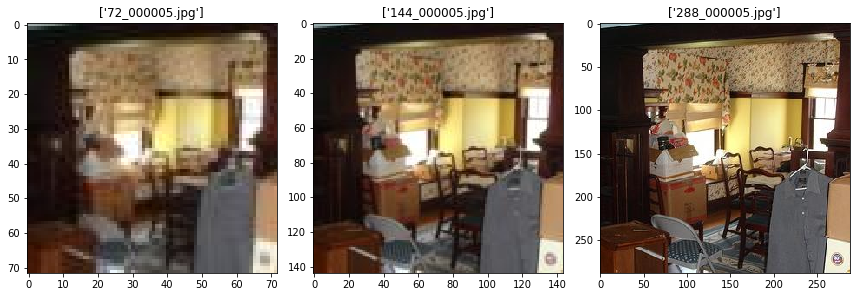

torch.Size([1, 3, 72, 72])


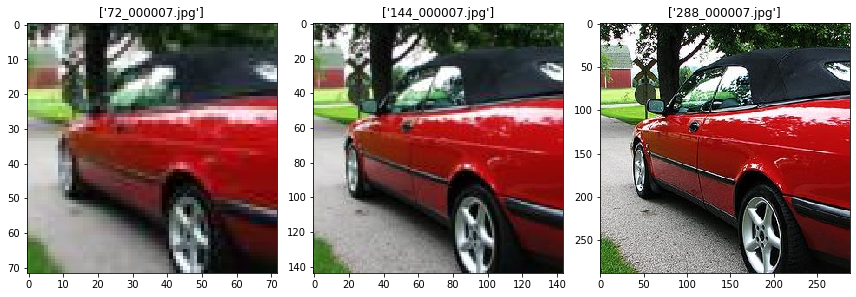

In [95]:
def show_img(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    #plt.show()

def show_3_images(labels,img1, img2, img3):
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    show_img(img1)
    plt.title(labels['small'])
    plt.subplot(1,3,2)
    show_img(img2)
    plt.title(labels['med'])
    plt.subplot(1,3,3)
    show_img(img3)
    plt.title(labels['large'])
    plt.tight_layout()
    plt.show()
    

# Can print from the val loader    
for step,batch in enumerate(val_loader):
    filenames,img_small,img_med,img_large = batch
    print(img_small.shape)
    #print(filenames)
    #show_img(torch.squeeze(img_small))
    #show_img(torch.squeeze(img_med))
    #show_img(torch.squeeze(img_large))
    
    show_3_images(filenames, torch.squeeze(img_small), torch.squeeze(img_med), torch.squeeze(img_large)   )
    #show_img(torch.squeeze(img))
    #print(torch.squeeze(img).shape)
    
